In [1]:
import tensorflow as tf
from callback import myCallback
from modelling import mnist_model_creating
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout
from tensorflow.keras.utils import to_categorical
import tensorflowjs as tfjs
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

C:\Users\Lales\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Lales\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Lales\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

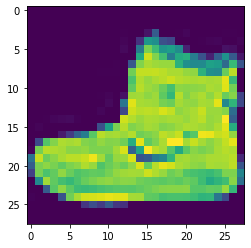

In [2]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

### DNN

In [3]:
def create_model(): 
  model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
  return model

In [4]:
callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = create_model()
model.fit(training_images, training_labels, epochs=100, callbacks=[callbacks])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 62us/sample - loss: 0.4759
Epoch 2/100
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3590
Epoch 3/100
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3199
Epoch 4/100
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2993
Epoch 5/100
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2800
Epoch 6/100
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2665
Epoch 7/100
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2534
Epoch 8/100
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2432
Epoch 9/100
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2319
Epoch 10/100
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2212
Epoch

In [5]:
#model.save_weights('MODELS/my_fashion')
#model.save('MODELS/my_fashion.h5')

### CNN

In [3]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.8.0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
____________________________________________

In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0609 - accuracy: 0.9870
0.9869999885559082


In [5]:
import pandas as pd
losses = pd.DataFrame(model.history.history)
losses.head()

""


In [6]:
#model.save_weights('MODELS/fashion/fashion')
#model.save('MODELS/fashion/fashion.h5')
#tfjs.converters.save_keras_model(model,"MODELS/fashion/models")

In [16]:
classifications = model.predict(test_images)

In [17]:
print(classifications[17])

print(test_labels[17])


[1.4936925e-18 8.8774142e-14 1.4255640e-13 3.6468120e-12 9.7160191e-17 4.5181661e-15 1.0040760e-20 1.0000000e+00 4.7726915e-18 1.0165536e-12]
7


In [10]:
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
losses = pd.DataFrame(model.history.history)

In [11]:
losses.head()

""
